<a href="https://colab.research.google.com/github/PabloDiosquez/Labo_De_Datos_UBA/blob/main/Clase_03_primera_parte_Preparaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Es muy raro que los datos de los que disponemos estén ya listos para ser usados**.

Lo más común es que los datos necesiten ser transformados previamente. Además, incluso antes de estas transformaciones es posible que los datos tengan que ser modificados y corregidos, porque el ingreso manual de datos por parte de seres humanos suele estar acompañado de errores. Una forma de resolver esto es estandarizar lo más posible la clase de datos que el operador puede ingresar, pero aún así es difícil que no hay datos que requieran ser corregidos.

En este notebook vamos a cargar y analizar un dataframe "de juguete" en el cual aparecen muchos de los errores más comunes que podemos encontrar. La idea es que los corrijamos, para luego estandarizar los datos y dejarlos listos para su análisis posterior.

**Empezamos cargando el dataframe.**



In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

filename = '/content/drive/My Drive/LaboDatos2022/dataframe_clase_3.csv'

df = pd.read_csv(filename)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/LaboDatos2022/dataframe_clase_3.csv'

**¡Obtuvimos un error!** Esto es muy común cuando cargamos datos desde un archivo csv. Lamentablemente, a veces hay una inferfencia entre el delimitador y los datos de las columnas, por ejemplo, en este caso el delimitador es "," y aparecen comas en las entradas de la tabla. La forma de resolver esto es reemplazar las comas por otro símbolo (por ejemplo, un punto) o bien cambiar el delimitador. En general esto es algo que puede pasar, y muchas veces es necesario inspeccionar los datos para darse cuenta.

In [ ]:
filename = '/content/dataframe_clase_3_corregido.csv'

df = pd.read_csv(filename)
print(df)

    Edad  Altura    Peso  Promedio         Sexo        LU    Observación 
0     25    1.80      83      7.79            H    125/89         ninguna
1     21   1.89m      86       9.7            H     35 88         ninguna
2     39    1.54      50       7.1            M    142-80    hipertension
3     49    1.66      70      6.54        Mujer    553/83         ninguna
4     31    1.70      81      7.21            H    495-83   hiper tension
5     33    1.74   93 kg       7.1          Hom     25/78       sobrepeso
6     29    1.81    82.5       6.9            H   445//81         ninguna
7     19    1.82    86.3      8.43            H      5/84         NINGUNA
8     20    1.76      75        10            M      1/81           gripe
9     65     NaN      70      4.21            M   1455-89          no hay
10    32    1.64      60      9.10            M    400-80         ninguna
11    59    1.70      67      8.99   No binarie    100/89         ninguna
12    34    1.81      97      7.46    

Claramente hay muchas cosas para arreglar. Lo primero que podemos querer hacer es descartar las filas que tienen algun valor faltante.



In [ ]:
df.dropna(inplace=True)
print(df)

    Edad  Altura    Peso  Promedio         Sexo        LU    Observación 
0     25    1.80      83      7.79            H    125/89         ninguna
1     21   1.89m      86       9.7            H     35 88         ninguna
2     39    1.54      50       7.1            M    142-80    hipertension
3     49    1.66      70      6.54        Mujer    553/83         ninguna
4     31    1.70      81      7.21            H    495-83   hiper tension
5     33    1.74   93 kg       7.1          Hom     25/78       sobrepeso
6     29    1.81    82.5       6.9            H   445//81         ninguna
7     19    1.82    86.3      8.43            H      5/84         NINGUNA
8     20    1.76      75        10            M      1/81           gripe
10    32    1.64      60      9.10            M    400-80         ninguna
11    59    1.70      67      8.99   No binarie    100/89         ninguna
12    34    1.81      97      7.46            H      1/89                
13    49    1.78     432      7.41    

Pero acá notamos algo importante: los Nan que creo Pandas al importar los datos con columnas faltantes son NaN de verdad (y por lo tanto cuentan para el método df.dropna). Pero los NaN que figuraban en los datos fueron transformados en el string "nan". Para eso, es necesario pasar del string "nan" al tipo np.Nan y luego usar df.dropna.

Veamos realmente cómo se cargaron los datos.

In [ ]:
df['Promedio'].str.lower()

KeyError: 'Promedio'

¿Por qué error? ¿No es 'Promedio' una columna de df?

In [ ]:
df.columns

Index(['Edad', ' Altura', ' Peso', ' Promedio', ' Sexo', ' LU',
       ' Observación '],
      dtype='object')

Ah! Las columnas empiezan con un espacio en blanco, por como estaban escritas en el archivo .csv

Podemos aceptarlo, aunque es medio incómodo. Entonces decidimos borrar los caracteres iniciales que estén en blanco usando el método lstrip()

In [ ]:
columns = list(df.columns)
for n, c in enumerate(df.columns):
  columns[n] = c.lstrip() # lstrip remueve caracteres iniciales en blanco, rstrip hace lo mismo con los caracteres finales
  columns[n] = c.rstrip()

df.columns = columns
df.columns

Index(['Edad', 'Altura', 'Peso', 'Promedio', 'Sexo', 'LU', 'Observación'], dtype='object')

Ahora por fin veamos cómo leyó nan la función pd.read_csv:

In [ ]:
df['Promedio'][20]
#type(df['Promedio'][20]

df['Observación'][20]

' NINGUNA'

Empezamos a detectar un problema recurrente: por como estaba escrito el archivo .csv, aparece un espacio delante de cada elemento que fue cargado como string.

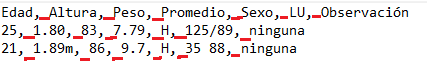

Tenemos las opciones:


1.   Remover los espacios en el dataframe que ya cargamos
2.   Volver a cargar los datos usando ahora la opción skipinitialspace=True en pd.read_csv
3.   Editar el archivo .csv, removiendo los espacios

Vamos a usar la opción 1 y luego mostrar que da lo mismo usar la opción 2

Lo que debemos hacer es recorrer todas las entradas, fijarnos si es un string, y si lo es, aplicarle .lstrip() - ya que si no es string, no puede empezar con caracteres en blanco, y si intentamos aplicar .lstrip() a algo que no es un string vamos a tener un error.

Entonces primero definimos una función que hace esto y luego la aplicamos a todo el dataframe.





In [ ]:
def remueve_espacio(x):
  if type(x)==str:
    return x.lstrip().rstrip()
  return x

df_2 = df.applymap(remueve_espacio)
df_2['Observación'][15]

df_2['Observación'].str.lstrip()

0           ninguna
1           ninguna
2      hipertension
3           ninguna
4     hiper tension
5         sobrepeso
6           ninguna
7           NINGUNA
8             gripe
9            no hay
10          ninguna
11          ninguna
12                 
13     dolor cabeza
14       hipertenso
15          ninguna
16          ninguna
17       no hay obs
18             nada
19          ninguna
20          NINGUNA
Name: Observación, dtype: object

Ahora podemos hacer algo parecido, pero para cambiar 'nan' por np.nan, y finalmente eliminar las filas con datos faltantes.

In [ ]:
import numpy as np

def cambia_nan(x):
  if x=='nan':
    return np.nan
  return x

df_3 = df_2.applymap(cambia_nan)

df_3.dropna(inplace=True)

df_3

,Edad,Altura,Peso,Promedio,Sexo,LU,Observación
0,25,1.80,83,7.79,H,125/89,ninguna
1,21,1.89m,86,9.70,H,35 88,ninguna
2,39,1.54,50,7.10,M,142-80,hipertension
3,49,1.66,70,6.54,Mujer,553/83,ninguna
4,31,1.70,81,7.21,H,495-83,hiper tension
5,33,1.74,93 kg,7.10,Hom,25/78,sobrepeso
6,29,1.81,82.5,6.90,H,445//81,ninguna
7,19,1.82,86.3,8.43,H,5/84,NINGUNA
8,20,1.76,75,10.00,M,1/81,gripe
10,32,1.64,60,9.10,M,400-80,ninguna


Dijimos que otra forma de hacerlo era cargando el archivo para ignorar los espacios luego del delimitador.

In [ ]:
df = pd.read_csv(filename, skipinitialspace=True)
df_2 = df.applymap(cambia_nan)
df_3.dropna(inplace=True)

df_3

,Edad,Altura,Peso,Promedio,Sexo,LU,Observación
0,25,1.80,83,7.79,H,125/89,ninguna
1,21,1.89m,86,9.7,H,35 88,ninguna
2,39,1.54,50,7.1,M,142-80,hipertension
3,49,1.66,70,6.54,Mujer,553/83,ninguna
4,31,1.70,81,7.21,H,495-83,hiper tension
5,33,1.74,93 kg,7.1,Hom,25/78,sobrepeso
6,29,1.81,82.5,6.9,H,445//81,ninguna
7,19,1.82,86.3,8.43,H,5/84,NINGUNA
8,20,1.76,75,10,M,1/81,gripe
10,32,1.64,60,9.10,M,400-80,ninguna


Ahora vamos a trabajar para limpiar las distintas columnas. Empecemos por la última: "observacion".

Nosotros sabemos que en esta columna un médico que examina al estudiante anote el resultado de la examinación. Si no tuvimos el recaudo de limitar lo que le médico podía llenar en esta columna, tenemos que esperar datos heterogéneos.

Este dataframe es lo suficientemente pequeño como para que podamos mirarlo entero en la pantalla, pero muchas veces no es el caso. Para esas situaciones es bueno poder tener una idea del tipo de datos distintos que tenemos y que tan frecuente son. Recordemos que podemos hacer eso con el método .value_counts()

In [ ]:
df_3['Observación'].value_counts()  # notar que quedó un caracter en blanco al final de "Observación". Podemos enroscarnos y cambiarlo o, a esta altura, vivir con él.

ninguna          8
hipertension     1
hiper tension    1
sobrepeso        1
NINGUNA          1
gripe            1
                 1
dolor cabeza     1
hipertenso       1
no hay obs       1
Name: Observación, dtype: int64

Entonces descubrimos que hay valores recurrentes, expresados de formas diferentes. Una opción es reemplazar estos valores por un código, por ejemplo: 0=ninguna, 1=hipertensión, etc. Otra opción es unificar criterios y elegir una única manera de expresar todas las entradas similares. Elijamos esta última.

Algo que puede ser útil antes de seguir es transformar todos los strings del array a lowercase (minúscula), lo cual ayuda con la unificación.


In [ ]:
def a_minuscula(x):
  if type(x)==str:
    return x.lower()
  return x

df_4 = df_3.applymap(a_minuscula)

df_4

,Edad,Altura,Peso,Promedio,Sexo,LU,Observación
0,25,1.80,83,7.79,h,125/89,ninguna
1,21,1.89m,86,9.7,h,35 88,ninguna
2,39,1.54,50,7.1,m,142-80,hipertension
3,49,1.66,70,6.54,mujer,553/83,ninguna
4,31,1.70,81,7.21,h,495-83,hiper tension
5,33,1.74,93 kg,7.1,hom,25/78,sobrepeso
6,29,1.81,82.5,6.9,h,445//81,ninguna
7,19,1.82,86.3,8.43,h,5/84,ninguna
8,20,1.76,75,10,m,1/81,gripe
10,32,1.64,60,9.10,m,400-80,ninguna


Ahora, simplemente tenemos que armar una función que reemplace los valores por uno representativo. Hay distintas formas, una es considerar explícitamente todas las posibilidades que vimos en value_count(), aunque esto puede ser mucho trabajo. Podemos inventar reglas que ayuden, por ejemplo, en este caso podríamos decir que si "hiper" está en el string, hay que reemplazar por "hipertensión", y sino, hacer lo mismo con "dolor" y "cabeza" para "dolor de cabeza" , y por último si no sucede ninguna de las dos cosas, reemplazar por "ninguna". Esto funciona para este caso, pero podría no servir si hubiese entradas en los que "hiper" aparece en otra palabra, por ejemplo, "hipertiroidismo".

In [ ]:
def arregla_observacion(x):
  if type(x)==str:
    if 'iper' in x and 'tens' in x:
      return "hipertension"
    elif 'dolor' in x and 'cabeza' in x:
      return "dolor de cabeza"
    return "ninguna"
  return x

df_5 = df_4.applymap(arregla_observacion)
df_5

,Edad,Altura,Peso,Promedio,Sexo,LU,Observación
0,25,ninguna,ninguna,ninguna,ninguna,ninguna,ninguna
1,21,ninguna,ninguna,ninguna,ninguna,ninguna,ninguna
2,39,ninguna,ninguna,ninguna,ninguna,ninguna,hipertension
3,49,ninguna,ninguna,ninguna,ninguna,ninguna,ninguna
4,31,ninguna,ninguna,ninguna,ninguna,ninguna,hipertension
5,33,ninguna,ninguna,ninguna,ninguna,ninguna,ninguna
6,29,ninguna,ninguna,ninguna,ninguna,ninguna,ninguna
7,19,ninguna,ninguna,ninguna,ninguna,ninguna,ninguna
8,20,ninguna,ninguna,ninguna,ninguna,ninguna,ninguna
10,32,ninguna,ninguna,ninguna,ninguna,ninguna,ninguna


Evidentemente hay un problema: en este dataframe todas las columnas salvo la primera son strings, y nosotros aplicamos la función a todo el dataframe, no a la columna "observaciones" nada más.

Podemos hacerlo solo sobre la columna correspondiente usando el método .apply aplicado a la serie df_4['Observacion']

In [ ]:
df_4['Observación'] = df_4['Observación'].apply(arregla_observacion)
df_4

,Edad,Altura,Peso,Promedio,Sexo,LU,Observación
0,25,1.80,83,7.79,h,125/89,ninguna
1,21,1.89m,86,9.7,h,35 88,ninguna
2,39,1.54,50,7.1,m,142-80,hipertension
3,49,1.66,70,6.54,mujer,553/83,ninguna
4,31,1.70,81,7.21,h,495-83,hipertension
5,33,1.74,93 kg,7.1,hom,25/78,ninguna
6,29,1.81,82.5,6.9,h,445//81,ninguna
7,19,1.82,86.3,8.43,h,5/84,ninguna
8,20,1.76,75,10,m,1/81,ninguna
10,32,1.64,60,9.10,m,400-80,ninguna


Lo que hicimos recién nos sugiere que TODAS las columnas de este datraframe salvo 'Edad' tienen tipo string ('Promedio' en un momento anterior tuvo los strings 'nan').

Esto es porque aparecen números mezclados con letras al principio o al final, típicamente por culpa de las personas que ingresan los datos.

Además, vemos que en la columna de LU tenemos muchas formas posibles de escribir el símbolo entre número y año. Eso es otra cosa que tenemos que estandarizar.

Finalmente, la columna 'Promedio' debería transformarse a enteros con coma flotante.

Podemos armar funciones encargadas de hacer estas cosas y pasarlas con el método .apply a las columnas correspondientes.

In [ ]:
def remueve_caracteres(x): # esta función remueve todos los caracteres, dejando únicamente números.
  if type(x)==str:
    return ''.join(c for c in x if c.isdigit() or c=='.') # list comprehension
  return x

def arregla_LU(x): # esta función reemplaza las posibilidades por siempre el mismo símbolo
  lista = ['\\\\','\\','-', ' ','//']
  if type(x)==str:
    for l in lista:
      x=x.replace(l,'/')
    return x
  return x


df_4['Altura'] = df_4['Altura'].apply(remueve_caracteres)
df_4['Peso'] = df_4['Peso'].apply(remueve_caracteres)
df_4['LU'] = df_4['LU'].apply(arregla_LU)
df_4['Promedio'] = df_4['Promedio'].apply(float)

df_4

,Edad,Altura,Peso,Promedio,Sexo,LU,Observación
0,25,1.80,83,7.79,h,125/89,ninguna
1,21,1.89,86,9.70,h,35/88,ninguna
2,39,1.54,50,7.10,m,142/80,hipertension
3,49,1.66,70,6.54,mujer,553/83,ninguna
4,31,1.70,81,7.21,h,495/83,hipertension
5,33,1.74,93,7.10,hom,25/78,ninguna
6,29,1.81,82.5,6.90,h,445/81,ninguna
7,19,1.82,86.3,8.43,h,5/84,ninguna
8,20,1.76,75,10.00,m,1/81,ninguna
10,32,1.64,60,9.10,m,400/80,ninguna


La columna de sexo podemos reemplazarla fácilmente por h,m y nb, decidiendo en base a si "h" o "m" pertenecen al string.

Pero si hacemos esto ciegamente corremos el riesgo de transformar "Azul" en "No binarie". Claramente "Azul" es un problema en el ingreso de los datos (posiblemente alguien se equivoco en el campo). Esta es la clase de cosas que descubrimos usando value_counts() y luego podemos descartar del análisis subsiguiente.

In [ ]:
print(df_4['Sexo'].value_counts(), '\n')

indice = df_4[df_4['Sexo']=='azul'].index # el indice donde esta la fila que dice "azul" en la columna "Sexo"
df_5 = df_4.drop(indice)
df_5

h             8
m             4
mujer         1
hom           1
no binarie    1
hombre        1
azul          1
Name: Sexo, dtype: int64 



,Edad,Altura,Peso,Promedio,Sexo,LU,Observación
0,25,1.80,83,7.79,h,125/89,ninguna
1,21,1.89,86,9.70,h,35/88,ninguna
2,39,1.54,50,7.10,m,142/80,hipertension
3,49,1.66,70,6.54,mujer,553/83,ninguna
4,31,1.70,81,7.21,h,495/83,hipertension
5,33,1.74,93,7.10,hom,25/78,ninguna
6,29,1.81,82.5,6.90,h,445/81,ninguna
7,19,1.82,86.3,8.43,h,5/84,ninguna
8,20,1.76,75,10.00,m,1/81,ninguna
10,32,1.64,60,9.10,m,400/80,ninguna


Ahora sí, unificamos esta última columna, y ya tenemos el dataframe limpiado.

In [ ]:
def arregla_sexo(x):
    if 'h' in x:
      return 'h'
    elif 'm' in x:
      return 'm'
    return 'nb'

df_5['Sexo'] = df_5['Sexo'].apply(arregla_sexo)

df_5

,Edad,Altura,Peso,Promedio,Sexo,LU,Observación
0,25,1.80,83,7.79,h,125/89,ninguna
1,21,1.89,86,9.70,h,35/88,ninguna
2,39,1.54,50,7.10,m,142/80,hipertension
3,49,1.66,70,6.54,m,553/83,ninguna
4,31,1.70,81,7.21,h,495/83,hipertension
5,33,1.74,93,7.10,h,25/78,ninguna
6,29,1.81,82.5,6.90,h,445/81,ninguna
7,19,1.82,86.3,8.43,h,5/84,ninguna
8,20,1.76,75,10.00,m,1/81,ninguna
10,32,1.64,60,9.10,m,400/80,ninguna


En el próximo notebook vamos a seguir trabajando sobre estos datos. Por lo tanto tenemos que aprender cómo exportar datos de Google Colab para luego volver a cargarlos.



In [ ]:
save_name = '/content/drive/My Drive/LaboratorioDatos_UBA/dataframe_clase_3_limpio.csv' # acá uds. van a tener que poner un directorio suyo en drive, porque no tienen permisos de escribir en el directorio LaboDatos2021

df_5.to_csv(save_name)